In [1]:
from pyspark import SparkContext
sc = SparkContext("local", "First App")

In [2]:
from pyspark.sql import SQLContext
sql_context=SQLContext(sc)

In [3]:
sql_context.sql("show tables").show()

+--------+--------------------+-----------+
|database|           tableName|isTemporary|
+--------+--------------------+-----------+
| default|         01demotable|      false|
| default|        01demotable1|      false|
| default|         01studentsk|      false|
| default|               04jun|      false|
| default|              04june|      false|
| default|1022908_youtube_data|      false|
| default|         181118_hive|      false|
| default|          1codeshare|      false|
| default|    201408_trip_data|      false|
| default|20180104_hive_431591|      false|
| default|20181110_hive_431591|      false|
| default|       20181118_hive|      false|
| default|20181118_hive_431591|      false|
| default|20181118_hive_431...|      false|
| default|20181121_sparkhiv...|      false|
| default|       21october_emp|      false|
| default|386334_bucketed_user|      false|
| default|  386334_partitioned|      false|
| default|386334_partitione...|      false|
| default|       386334bucket1| 

In [4]:
df= sql_context.sql('select * from 1022908_youtube_data')

In [5]:
df.printSchema()

root
 |-- video_id: string (nullable = true)
 |-- uploader: string (nullable = true)
 |-- video_interval: integer (nullable = true)
 |-- category: string (nullable = true)
 |-- video_length: integer (nullable = true)
 |-- no_of_views: integer (nullable = true)
 |-- rating: float (nullable = true)
 |-- no_of_ratings: integer (nullable = true)
 |-- no_of_comments: integer (nullable = true)
 |-- related_video_ids: string (nullable = true)



In [6]:
df.show()

+-----------+--------------------+--------------+----------------+------------+-----------+------+-------------+--------------+-----------------+
|   video_id|            uploader|video_interval|        category|video_length|no_of_views|rating|no_of_ratings|no_of_comments|related_video_ids|
+-----------+--------------------+--------------+----------------+------------+-----------+------+-------------+--------------+-----------------+
|QuRYeRnAuXM|EvilSquirrelPictures|          1135|  Pets & Animals|         252|       1075|  4.96|           46|            86|      gFa1YMEJFag|
|3TYqkBJ9YRk|              hggh22|          1135|          Comedy|         169|        228|   5.0|            5|             3|      QuRYeRnAuXM|
|rSJ8QZWBegU|             TimeGem|          1135|   Entertainment|          95|        356|  4.31|           13|             1|      QuRYeRnAuXM|
|nRcovJn9xHg|          wooochacha|          1135|   Entertainment|         118|       1115|  2.23|           57|            

In [7]:
df2 = df.groupby('category').sum('no_of_views')

In [8]:
df2.show()

+--------------------+----------------+
|            category|sum(no_of_views)|
+--------------------+----------------+
|           Education|         1917433|
|       Entertainment|       143251525|
|     Travel & Events|         5105907|
|Science & Technology|         5598645|
|              Sports|        25838327|
|                null|            null|
|       Howto & Style|        24357536|
|Nonprofits & Acti...|          230604|
|    Film & Animation|        87836805|
|      People & Blogs|        25817080|
|     News & Politics|        21943068|
|      Pets & Animals|        60518898|
|                UNA |         5060911|
|    Autos & Vehicles|         3101409|
|               Music|       293427394|
|              Comedy|        87624773|
+--------------------+----------------+



In [9]:
import seaborn as sn
import matplotlib.pyplot as plt

In [10]:
df_pandas = df2.toPandas()
print(df_pandas)

                 category  sum(no_of_views)
0               Education         1917433.0
1           Entertainment       143251525.0
2         Travel & Events         5105907.0
3    Science & Technology         5598645.0
4                  Sports        25838327.0
5                    None               NaN
6           Howto & Style        24357536.0
7   Nonprofits & Activism          230604.0
8        Film & Animation        87836805.0
9          People & Blogs        25817080.0
10        News & Politics        21943068.0
11         Pets & Animals        60518898.0
12                   UNA          5060911.0
13       Autos & Vehicles         3101409.0
14                  Music       293427394.0
15                 Comedy        87624773.0


In [11]:
df_pandas = df_pandas.dropna(how='any')


In [12]:
df_pandas

,category,sum(no_of_views)
0,Education,1917433.0
1,Entertainment,143251525.0
2,Travel & Events,5105907.0
3,Science & Technology,5598645.0
4,Sports,25838327.0
6,Howto & Style,24357536.0
7,Nonprofits & Activism,230604.0
8,Film & Animation,87836805.0
9,People & Blogs,25817080.0
10,News & Politics,21943068.0


/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


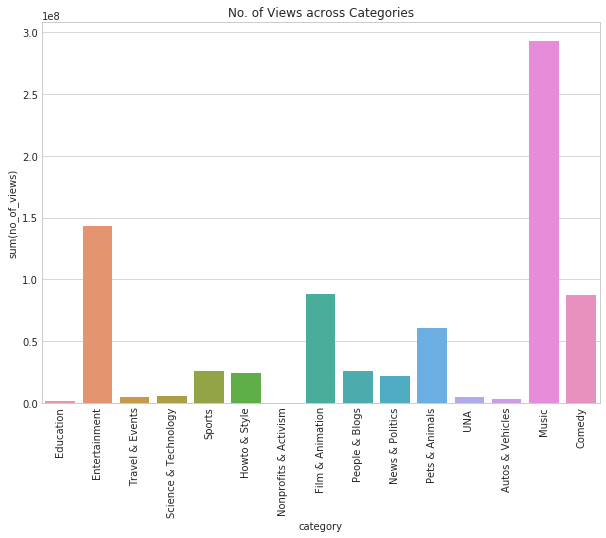

In [13]:
plt.figure(figsize=(10,7))
sn.set_style('whitegrid')
sn.barplot(df_pandas['category'],df_pandas['sum(no_of_views)'])
plt.title('No. of Views across Categories')
plt.xticks(rotation=90)
plt.show()

In [14]:
df2 = df.groupby('category').mean('rating')

In [15]:
df_pandas = df2.toPandas()
print(df_pandas)

                 category  avg(rating)
0               Education     3.341385
1           Entertainment     3.666652
2         Travel & Events     3.314375
3    Science & Technology     3.183250
4                  Sports     3.520000
5                    None          NaN
6           Howto & Style     3.345547
7   Nonprofits & Activism     3.270476
8        Film & Animation     4.087962
9          People & Blogs     3.594774
10        News & Politics     3.809489
11         Pets & Animals     3.369053
12                   UNA      4.262500
13       Autos & Vehicles     3.840649
14                  Music     4.244606
15                 Comedy     3.497971


In [16]:
df_pandas = df_pandas.dropna(how='any')

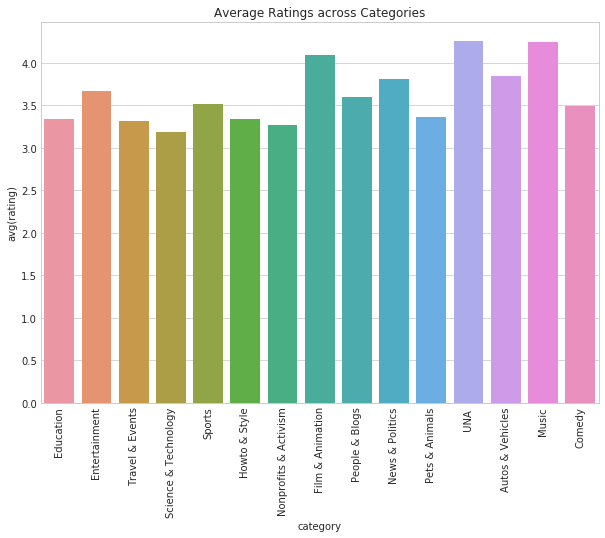

In [17]:
plt.figure(figsize=(10,7))
sn.set_style('whitegrid')
sn.barplot(df_pandas['category'],df_pandas['avg(rating)'])
plt.title('Average Ratings across Categories')
plt.xticks(rotation=90)
plt.show()

In [18]:
df2 = df.groupby('category').sum('no_of_comments')

In [19]:
df_pandas = df2.toPandas()
print(df_pandas)

                 category  sum(no_of_comments)
0               Education               4638.0
1           Entertainment             739311.0
2         Travel & Events              25681.0
3    Science & Technology              36704.0
4                  Sports              43050.0
5                    None                  NaN
6           Howto & Style              62888.0
7   Nonprofits & Activism               1744.0
8        Film & Animation              50587.0
9          People & Blogs              90304.0
10        News & Politics              70834.0
11         Pets & Animals             110439.0
12                   UNA                6517.0
13       Autos & Vehicles               2448.0
14                  Music             611136.0
15                 Comedy             318516.0


In [20]:
df_pandas = df_pandas.dropna(how='any')

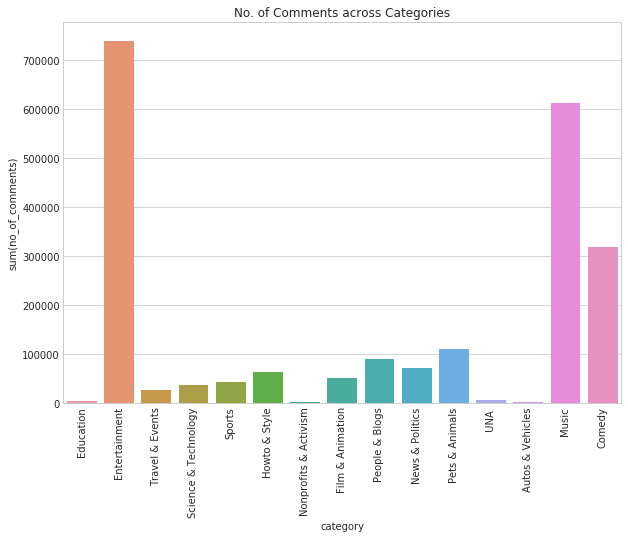

In [21]:
plt.figure(figsize=(10,7))
sn.set_style('whitegrid')
sn.barplot(df_pandas['category'],df_pandas['sum(no_of_comments)'])
plt.title('No. of Comments across Categories')
plt.xticks(rotation=90)
plt.show()

In [22]:
df2 = df.groupby('category').mean('video_length')                          

In [23]:
df_pandas = df2.toPandas()
print(df_pandas)

                 category  avg(video_length)
0               Education         253.446154
1           Entertainment         231.339207
2         Travel & Events         193.223214
3    Science & Technology         182.525000
4                  Sports         169.147410
5                    None                NaN
6           Howto & Style         264.715328
7   Nonprofits & Activism         231.166667
8        Film & Animation         252.515385
9          People & Blogs         226.256281
10        News & Politics         251.939940
11         Pets & Animals         192.757895
12                   UNA          168.437500
13       Autos & Vehicles         304.818182
14                  Music         266.408353
15                 Comedy         191.729469


In [24]:
df_pandas = df_pandas.dropna(how='any')

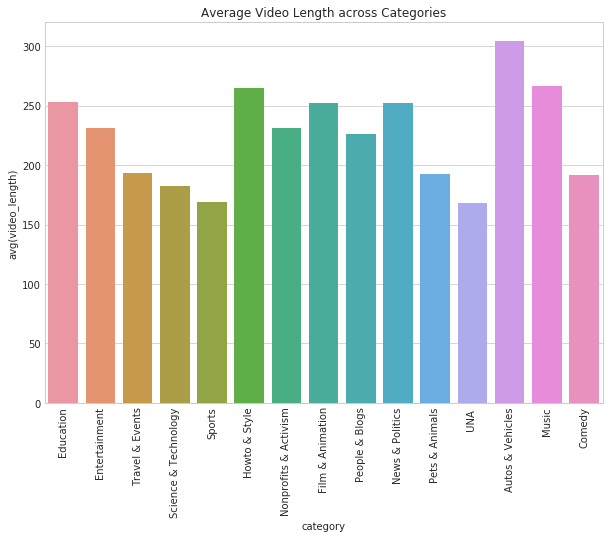

In [25]:
plt.figure(figsize=(10,7))
sn.set_style('whitegrid')
sn.barplot(df_pandas['category'],df_pandas['avg(video_length)'])
plt.title('Average Video Length across Categories')
plt.xticks(rotation=90)
plt.show()

In [26]:
df_pandas_main = df.toPandas()
print(df_pandas_main)

         video_id              uploader  video_interval          category  \
0     QuRYeRnAuXM  EvilSquirrelPictures          1135.0    Pets & Animals   
1     3TYqkBJ9YRk                hggh22          1135.0            Comedy   
2     rSJ8QZWBegU               TimeGem          1135.0     Entertainment   
3     nRcovJn9xHg            wooochacha          1135.0     Entertainment   
4     UEvVksP91kg              johnx113          1135.0     Entertainment   
5     sVkuOk4jmCo         marcosoycadiz          1135.0    People & Blogs   
6     ZTopArY7Nbg           TroyChannel          1136.0     Entertainment   
7     0RViGi2Rne8          OmnipotentSI          1135.0     Entertainment   
8     HT_QlOJbDpg     dumbasstheredneck          1095.0            Comedy   
9     ShhClb6J-NA           thecrashguy          1136.0     Entertainment   
10    g9e1alirMhc        iamdanielisaac           541.0            Comedy   
11    YZev1imoxX8       threefirstnames          1135.0     Entertainment   

In [27]:
df_pandas_main

,video_id,uploader,video_interval,category,video_length,no_of_views,rating,no_of_ratings,no_of_comments,related_video_ids
0,QuRYeRnAuXM,EvilSquirrelPictures,1135.0,Pets & Animals,252.0,1075.0,4.96,46.0,86.0,gFa1YMEJFag
1,3TYqkBJ9YRk,hggh22,1135.0,Comedy,169.0,228.0,5.00,5.0,3.0,QuRYeRnAuXM
2,rSJ8QZWBegU,TimeGem,1135.0,Entertainment,95.0,356.0,4.31,13.0,1.0,QuRYeRnAuXM
3,nRcovJn9xHg,wooochacha,1135.0,Entertainment,118.0,1115.0,2.23,57.0,73.0,QuRYeRnAuXM
4,UEvVksP91kg,johnx113,1135.0,Entertainment,83.0,281.0,2.67,9.0,16.0,gFa1YMEJFag
5,sVkuOk4jmCo,marcosoycadiz,1135.0,People & Blogs,49.0,1196.0,3.67,6.0,5.0,yjt5v88-6Aw
6,ZTopArY7Nbg,TroyChannel,1136.0,Entertainment,145.0,11.0,0.00,0.0,0.0,THM3FYUNyr8
7,0RViGi2Rne8,OmnipotentSI,1135.0,Entertainment,9.0,490.0,2.31,26.0,15.0,rSJ8QZWBegU
8,HT_QlOJbDpg,dumbasstheredneck,1095.0,Comedy,14.0,1349.0,2.09,22.0,13.0,cdbp6rCVzRs
9,ShhClb6J-NA,thecrashguy,1136.0,Entertainment,61.0,29.0,0.00,0.0,0.0,8dEezTw8J_o


In [28]:
df_pandas_main.isnull().sum()

video_id               0
uploader              34
video_interval        66
category              34
video_length          34
no_of_views           34
rating                34
no_of_ratings         34
no_of_comments        34
related_video_ids    861
dtype: int64

In [29]:
df3 = df_pandas_main.groupby('uploader')[['no_of_views']].sum()
df3

,no_of_views
uploader,
000ILoveNaruto000,194.0
007SimsMan,7032.0
007soldier,114.0
033164,1129.0
09224221550,1101.0
0eros80,391.0
0merone,1019.0
0sonalika0,752.0
1001BG,129.0


In [30]:
df3 = df3.sort_values(by='no_of_views',ascending=False)
df3 = df3.iloc[:21,:]
df3

,no_of_views
uploader,
kaejane,65341925.0
ChrisBrownTV,33754615.0
TPainVideos,30197909.0
Jason275,27721690.0
itschriscrocker,23473833.0
TayZonday,20340997.0
RKellyTV,13038204.0
machinima,11437210.0
TownIdiot25,11007201.0


In [31]:
df3 = df3.reset_index()

In [32]:
df3

,uploader,no_of_views
0,kaejane,65341925.0
1,ChrisBrownTV,33754615.0
2,TPainVideos,30197909.0
3,Jason275,27721690.0
4,itschriscrocker,23473833.0
5,TayZonday,20340997.0
6,RKellyTV,13038204.0
7,machinima,11437210.0
8,TownIdiot25,11007201.0
9,Frozentoast,10172172.0


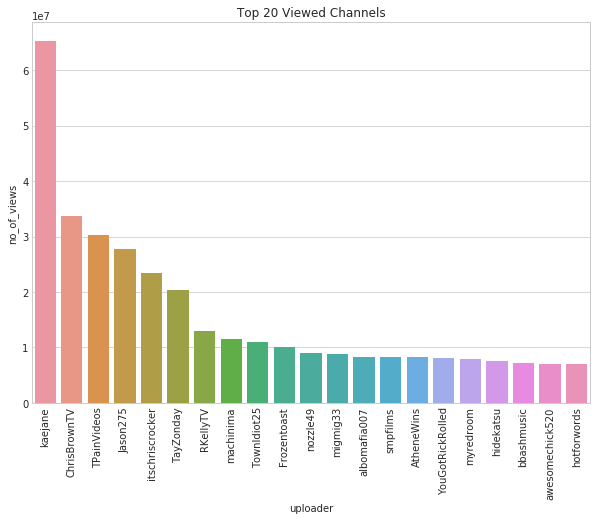

In [33]:
plt.figure(figsize=(10,7))
sn.set_style('whitegrid')
sn.barplot(df3['uploader'],df3['no_of_views'])
plt.title('Top 20 Viewed Channels')
plt.xticks(rotation=90)
plt.show()

In [34]:
df3 = df_pandas_main.groupby('uploader')[['no_of_ratings']].mean()
df3

,no_of_ratings
uploader,
000ILoveNaruto000,5.000000
007SimsMan,23.000000
007soldier,2.000000
033164,13.000000
09224221550,6.000000
0eros80,0.000000
0merone,0.000000
0sonalika0,2.000000
1001BG,2.000000


In [35]:
df3 = df3.sort_values(by='no_of_ratings',ascending=False)
df3 = df3.iloc[:21,:]
df3

,no_of_ratings
uploader,
TownIdiot25,75004.0
ChrisBrownTV,73257.0
Jason275,58850.0
TayZonday,50083.5
Frozentoast,43774.0
thePranker,37247.0
fistofblog,33172.0
itschriscrocker,29629.5
YouGotRickRolled,23256.0


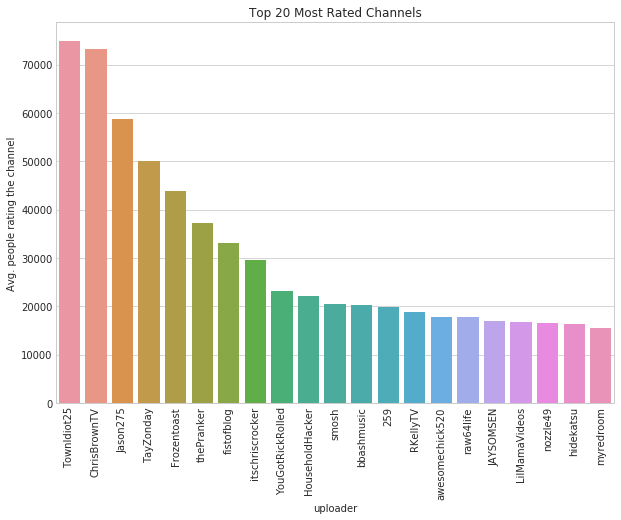

In [36]:
df3 = df3.reset_index()
plt.figure(figsize=(10,7))
sn.set_style('whitegrid')
sn.barplot(df3['uploader'],df3['no_of_ratings'])
plt.title('Top 20 Most Rated Channels')
plt.ylabel('Avg. people rating the channel')
plt.xticks(rotation=90)
plt.show()

In [37]:
df3 = df_pandas_main.groupby('uploader')[['no_of_comments']].mean()
df3 = df3.sort_values(by='no_of_comments',ascending=False)
df3 = df3.iloc[:21,:]
df3

,no_of_comments
uploader,
TayZonday,75261.500000
itschriscrocker,57758.666667
ChrisBrownTV,50036.000000
mileymandy,33543.000000
TownIdiot25,30666.000000
HouseholdHacker,29786.000000
Frozentoast,29330.000000
YouGotRickRolled,29160.000000
Jason275,24004.000000


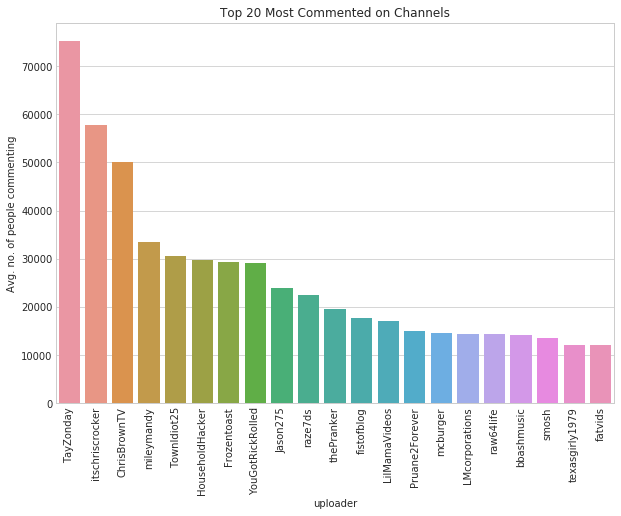

In [38]:
df3 = df3.reset_index()
plt.figure(figsize=(10,7))
sn.set_style('whitegrid')
sn.barplot(df3['uploader'],df3['no_of_comments'])
plt.title('Top 20 Most Commented on Channels')
plt.ylabel('Avg. no. of people commenting')
plt.xticks(rotation=90)
plt.show()

/usr/local/anaconda/python2/lib/python2.7/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


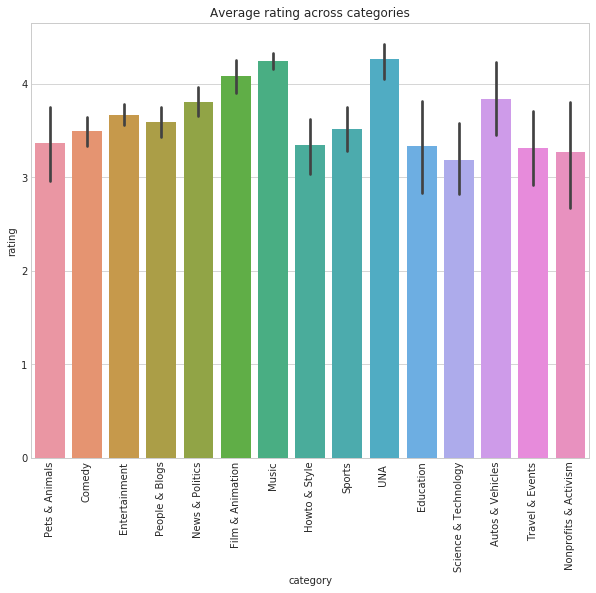

In [39]:
plt.figure(figsize=(10,8))
sn.barplot(df_pandas_main['category'],df_pandas_main['rating'])
plt.title('Average rating across categories')
plt.xticks(rotation=90)
plt.show()

### MULTIVARIATE ANALYSIS FOR RATING PREDICTION

In [40]:
from pyspark.ml.feature import StringIndexer

In [41]:
df_pandas_main

,video_id,uploader,video_interval,category,video_length,no_of_views,rating,no_of_ratings,no_of_comments,related_video_ids
0,QuRYeRnAuXM,EvilSquirrelPictures,1135.0,Pets & Animals,252.0,1075.0,4.96,46.0,86.0,gFa1YMEJFag
1,3TYqkBJ9YRk,hggh22,1135.0,Comedy,169.0,228.0,5.00,5.0,3.0,QuRYeRnAuXM
2,rSJ8QZWBegU,TimeGem,1135.0,Entertainment,95.0,356.0,4.31,13.0,1.0,QuRYeRnAuXM
3,nRcovJn9xHg,wooochacha,1135.0,Entertainment,118.0,1115.0,2.23,57.0,73.0,QuRYeRnAuXM
4,UEvVksP91kg,johnx113,1135.0,Entertainment,83.0,281.0,2.67,9.0,16.0,gFa1YMEJFag
5,sVkuOk4jmCo,marcosoycadiz,1135.0,People & Blogs,49.0,1196.0,3.67,6.0,5.0,yjt5v88-6Aw
6,ZTopArY7Nbg,TroyChannel,1136.0,Entertainment,145.0,11.0,0.00,0.0,0.0,THM3FYUNyr8
7,0RViGi2Rne8,OmnipotentSI,1135.0,Entertainment,9.0,490.0,2.31,26.0,15.0,rSJ8QZWBegU
8,HT_QlOJbDpg,dumbasstheredneck,1095.0,Comedy,14.0,1349.0,2.09,22.0,13.0,cdbp6rCVzRs
9,ShhClb6J-NA,thecrashguy,1136.0,Entertainment,61.0,29.0,0.00,0.0,0.0,8dEezTw8J_o


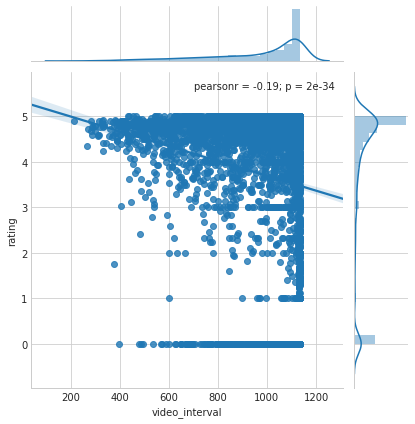

In [42]:
sn.jointplot(df_pandas_main['video_interval'],df_pandas_main['rating'],kind='reg')
plt.show()

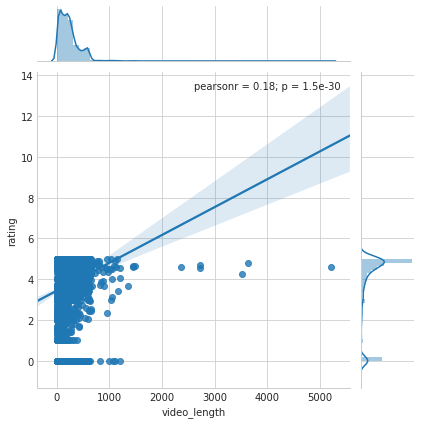

In [43]:
sn.jointplot(df_pandas_main['video_length'],df_pandas_main['rating'],kind='reg')
plt.show()

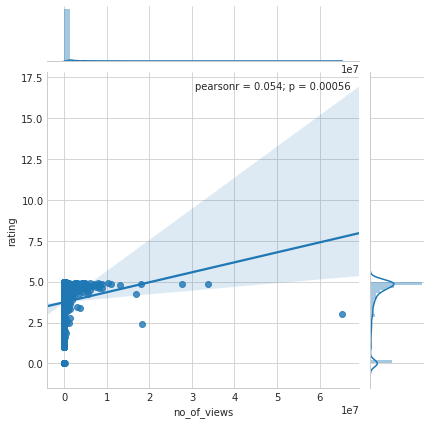

In [44]:
sn.jointplot(df_pandas_main['no_of_views'],df_pandas_main['rating'],kind='reg')
plt.show()

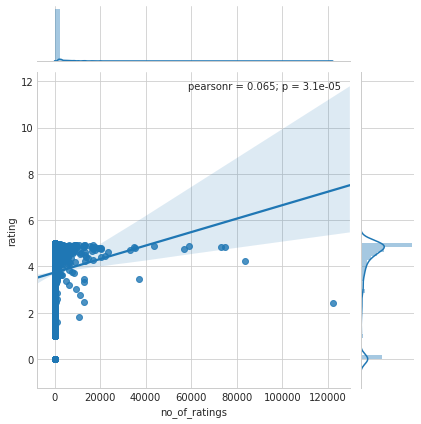

In [45]:
sn.jointplot(df_pandas_main['no_of_ratings'],df_pandas_main['rating'],kind='reg')
plt.show()

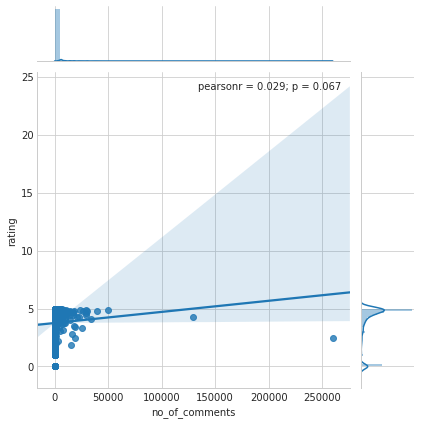

In [46]:
sn.jointplot(df_pandas_main['no_of_comments'],df_pandas_main['rating'],kind='reg')
plt.show()

In [47]:
df_pandas_main.corr()

,video_interval,video_length,no_of_views,rating,no_of_ratings,no_of_comments
video_interval,1.000000,-0.110307,-0.144531,-0.190961,-0.108653,-0.054166
video_length,-0.110307,1.000000,0.019856,0.178757,0.016469,-0.000131
no_of_views,-0.144531,0.019856,1.000000,0.054064,0.640481,0.453962
rating,-0.190961,0.178757,0.054064,1.000000,0.065330,0.028755
no_of_ratings,-0.108653,0.016469,0.640481,0.065330,1.000000,0.850478
no_of_comments,-0.054166,-0.000131,0.453962,0.028755,0.850478,1.000000


In [48]:
df_pandas_main.isnull().sum()

video_id               0
uploader              34
video_interval        66
category              34
video_length          34
no_of_views           34
rating                34
no_of_ratings         34
no_of_comments        34
related_video_ids    861
dtype: int64

In [49]:
df_pandas_main['no_of_comments'].describe()

count      4066.000000
mean        534.873832
std        5032.528304
min           0.000000
25%           2.000000
50%          12.000000
75%          94.000000
max      259683.000000
Name: no_of_comments, dtype: float64

In [50]:
df_pandas_main['no_of_comments'].median()

12.0

In [51]:
df_pandas_main.shape

(4100, 10)

In [52]:
df_pandas_main = df_pandas_main[df_pandas_main['no_of_comments']<=50000]

In [53]:
df_pandas_main.shape

(4063, 10)

In [54]:
df_pandas_main['video_length'].describe()

count    4063.000000
mean      232.908934
std       219.548347
min         1.000000
25%        90.000000
50%       194.000000
75%       306.000000
max      5202.000000
Name: video_length, dtype: float64

In [55]:
df_pandas_main['video_length'].median()

194.0

In [56]:
df_pandas_main = df_pandas_main[df_pandas_main['video_length']<=2000]

In [57]:
df_pandas_main.shape

(4057, 10)

In [58]:
df_pandas_main['no_of_ratings'].describe()

count     4057.000000
mean       519.662559
std       2753.235492
min          0.000000
25%          2.000000
50%         13.000000
75%        105.000000
max      75004.000000
Name: no_of_ratings, dtype: float64

In [59]:
df_pandas_main['no_of_ratings'].median()

13.0

In [60]:
df_pandas_main = df_pandas_main[df_pandas_main['no_of_ratings']<=5000]

In [61]:
df_pandas_main.shape

(3961, 10)

In [62]:
df_pandas_main['video_interval'].describe()

count    3929.000000
mean      968.437261
std       193.811505
min       265.000000
25%       863.000000
50%      1053.000000
75%      1122.000000
max      1136.000000
Name: video_interval, dtype: float64

/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


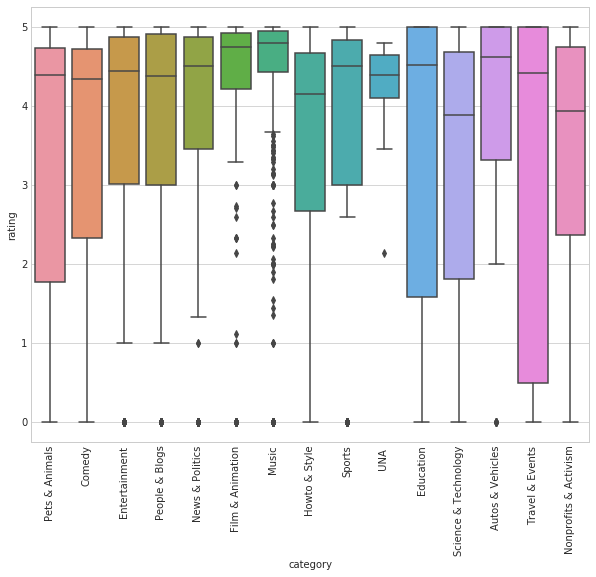

In [64]:
plt.figure(figsize=(10,8))
sn.boxplot(df_pandas_main['category'],df_pandas_main['rating'])
plt.xticks(rotation=90)
plt.show()